In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

In [2]:
import os

In [19]:
import os
for dirname, _, filenames in os.walk('D:\\Upgrad\\Upgrad_14March_Assignment\\BFSICreditScore'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\Upgrad\Upgrad_14March_Assignment\BFSICreditScore\Data_Dictionary_BFSI.xlsx
D:\Upgrad\Upgrad_14March_Assignment\BFSICreditScore\test.csv
D:\Upgrad\Upgrad_14March_Assignment\BFSICreditScore\train.csv


In [22]:
train = pd.read_csv('D:\\Upgrad\\Upgrad_14March_Assignment\\BFSICreditScore\\train.csv',low_memory=False)
test = pd.read_csv('D:\\Upgrad\\Upgrad_14March_Assignment\\BFSICreditScore\\test.csv')

In [23]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [24]:
train.shape

(100000, 28)

In [25]:
train.isna().sum()/train.shape[0]
test.isna().sum()/train.shape[0]

ID                          0.00000
Customer_ID                 0.00000
Month                       0.00000
Name                        0.05015
Age                         0.00000
SSN                         0.00000
Occupation                  0.00000
Annual_Income               0.00000
Monthly_Inhand_Salary       0.07498
Num_Bank_Accounts           0.00000
Num_Credit_Card             0.00000
Interest_Rate               0.00000
Num_of_Loan                 0.00000
Type_of_Loan                0.05704
Delay_from_due_date         0.00000
Num_of_Delayed_Payment      0.03498
Changed_Credit_Limit        0.00000
Num_Credit_Inquiries        0.01035
Credit_Mix                  0.00000
Outstanding_Debt            0.00000
Credit_Utilization_Ratio    0.00000
Credit_History_Age          0.04470
Payment_of_Min_Amount       0.00000
Total_EMI_per_month         0.00000
Amount_invested_monthly     0.02271
Payment_Behaviour           0.00000
Monthly_Balance             0.00562
dtype: float64

In [38]:
train.isna().sum()/train.shape[0]

ID                          0.00000
Customer_ID                 0.00000
Month                       0.00000
Name                        0.09985
Age                         0.00000
SSN                         0.00000
Occupation                  0.00000
Annual_Income               0.00000
Monthly_Inhand_Salary       0.15002
Num_Bank_Accounts           0.00000
Num_Credit_Card             0.00000
Interest_Rate               0.00000
Num_of_Loan                 0.00000
Type_of_Loan                0.11408
Delay_from_due_date         0.00000
Num_of_Delayed_Payment      0.07002
Changed_Credit_Limit        0.00000
Num_Credit_Inquiries        0.01965
Credit_Mix                  0.00000
Outstanding_Debt            0.00000
Credit_Utilization_Ratio    0.00000
Credit_History_Age          0.09030
Payment_of_Min_Amount       0.00000
Total_EMI_per_month         0.00000
Amount_invested_monthly     0.04479
Payment_Behaviour           0.00000
Monthly_Balance             0.01200
Credit_Score                

In [39]:
test.isna().sum()/test.shape[0]

ID                          0.00000
Customer_ID                 0.00000
Month                       0.00000
Name                        0.10030
Age                         0.00000
SSN                         0.00000
Occupation                  0.00000
Annual_Income               0.00000
Monthly_Inhand_Salary       0.14996
Num_Bank_Accounts           0.00000
Num_Credit_Card             0.00000
Interest_Rate               0.00000
Num_of_Loan                 0.00000
Type_of_Loan                0.11408
Delay_from_due_date         0.00000
Num_of_Delayed_Payment      0.06996
Changed_Credit_Limit        0.00000
Num_Credit_Inquiries        0.02070
Credit_Mix                  0.00000
Outstanding_Debt            0.00000
Credit_Utilization_Ratio    0.00000
Credit_History_Age          0.08940
Payment_of_Min_Amount       0.00000
Total_EMI_per_month         0.00000
Amount_invested_monthly     0.04542
Payment_Behaviour           0.00000
Monthly_Balance             0.01124
dtype: float64

In [40]:
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [41]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [42]:
train.select_dtypes("object_")

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,_,809.98,22 Years and 1 Months,No,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,NaN,No,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,Good,809.98,22 Years and 3 Months,No,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,6.27,Good,809.98,22 Years and 4 Months,No,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,22 Years and 5 Months,No,41.42015309,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,2,"Auto Loan, and Student Loan",7,11.5,_,502.38,31 Years and 6 Months,No,60.97133256,High_spent_Large_value_payments,479.8662282,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,2,"Auto Loan, and Student Loan",7,11.5,_,502.38,31 Years and 7 Months,No,54.18595029,High_spent_Medium_value_payments,496.6516104,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,2,"Auto Loan, and Student Loan",6,11.5,Good,502.38,31 Years and 8 Months,No,24.02847745,High_spent_Large_value_payments,516.8090833,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,2,"Auto Loan, and Student Loan",NaN,11.5,Good,502.38,31 Years and 9 Months,No,251.6725822,Low_spent_Large_value_payments,319.1649785,Standard


In [43]:
test.select_dtypes("object_")

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,Good,809.98,22 Years and 9 Months,No,236.642682,Low_spent_Small_value_payments,186.2667021
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",9,13.27,Good,809.98,22 Years and 10 Months,No,21.46538026,High_spent_Medium_value_payments,361.4440039
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,12.27,Good,809.98,NaN,No,148.2339379,Low_spent_Medium_value_payments,264.6754462
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,11.27,Good,809.98,23 Years and 0 Months,No,39.08251089,High_spent_Medium_value_payments,343.8268732
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,1,Credit-Builder Loan,1,5.42,Good,605.03,27 Years and 3 Months,No,39.68401842,High_spent_Large_value_payments,485.2984337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",25,18.31,_,3571.7,NaN,Yes,146.4863248,Low_spent_Small_value_payments,275.5395695
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,2_,"Auto Loan, and Student Loan",NaN,11.5,Good,502.38,31 Years and 11 Months,NM,181.442999,Low_spent_Small_value_payments,409.3945617
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,2,"Auto Loan, and Student Loan",5,13.5,Good,502.38,32 Years and 0 Months,No,__10000__,Low_spent_Large_value_payments,349.7263321
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,2_,"Auto Loan, and Student Loan",6_,11.5,Good,502.38,32 Years and 1 Months,No,97.59857973,High_spent_Small_value_payments,463.238981


In [106]:
#Let's join the datasets and drop columns that are not required
df = pd.concat([test,train])

In [107]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [108]:
train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633330,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [83]:
df.select_dtypes("object_")

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,Good,809.98,22 Years and 9 Months,No,236.642682,Low_spent_Small_value_payments,186.2667021,NaN
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",9,13.27,Good,809.98,22 Years and 10 Months,No,21.46538026,High_spent_Medium_value_payments,361.4440039,NaN
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,12.27,Good,809.98,NaN,No,148.2339379,Low_spent_Medium_value_payments,264.6754462,NaN
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,11.27,Good,809.98,23 Years and 0 Months,No,39.08251089,High_spent_Medium_value_payments,343.8268732,NaN
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,1,Credit-Builder Loan,1,5.42,Good,605.03,27 Years and 3 Months,No,39.68401842,High_spent_Large_value_payments,485.2984337,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,2,"Auto Loan, and Student Loan",7,11.5,_,502.38,31 Years and 6 Months,No,60.97133256,High_spent_Large_value_payments,479.8662282,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,2,"Auto Loan, and Student Loan",7,11.5,_,502.38,31 Years and 7 Months,No,54.18595029,High_spent_Medium_value_payments,496.6516104,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,2,"Auto Loan, and Student Loan",6,11.5,Good,502.38,31 Years and 8 Months,No,24.02847745,High_spent_Large_value_payments,516.8090833,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,2,"Auto Loan, and Student Loan",NaN,11.5,Good,502.38,31 Years and 9 Months,No,251.6725822,Low_spent_Large_value_payments,319.1649785,Standard


In [84]:
df['Type_of_Loan'].value_counts()

Not Specified                                                                                                                         2112
Credit-Builder Loan                                                                                                                   1920
Personal Loan                                                                                                                         1908
Debt Consolidation Loan                                                                                                               1896
Student Loan                                                                                                                          1860
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                12
Payday Loan, Mortgage Loan,

In [85]:
df["Type_of_Loan"].replace({"not Specified": "others", "Not Specified": "others"}, inplace=True)

In [86]:
df['Type_of_Loan'].value_counts()

others                                                                                                                                2112
Credit-Builder Loan                                                                                                                   1920
Personal Loan                                                                                                                         1908
Debt Consolidation Loan                                                                                                               1896
Student Loan                                                                                                                          1860
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                12
Payday Loan, Mortgage Loan,

In [87]:
df['Credit_History_Age'].value_counts()

17 Years and 11 Months    628
18 Years and 4 Months     621
18 Years and 3 Months     617
19 Years and 9 Months     615
18 Years and 2 Months     615
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 11 Months     15
34 Years and 0 Months      14
0 Years and 1 Months        2
Name: Credit_History_Age, Length: 408, dtype: int64

In [88]:
float_columns = df.select_dtypes("float64").columns

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
scale = MinMaxScaler()

In [63]:
df[float_columns] = pd.DataFrame(scale.fit_transform( df[float_columns]),columns =  float_columns)
float_columns
#Haven't scaled integer columns since we can consider them as ordinal variables

Index(['Monthly_Inhand_Salary', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month'],
      dtype='object')

In [89]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [90]:
y = df['Outstanding_Debt']
Loan_id = df['ID']
Customer_ID = df['Customer_ID']

In [93]:
df['Target'] = y

In [94]:
df.head()
df['Loan ID'] = Loan_id

In [95]:
test_prep = df.loc[df['Target'].isnull()]
train_prep = df.loc[df['Target'].notna()]

In [96]:
(test_prep.shape[0]+train_prep.shape[0]) == (test.shape[0]+train.shape[0])

True

In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

<AxesSubplot:>

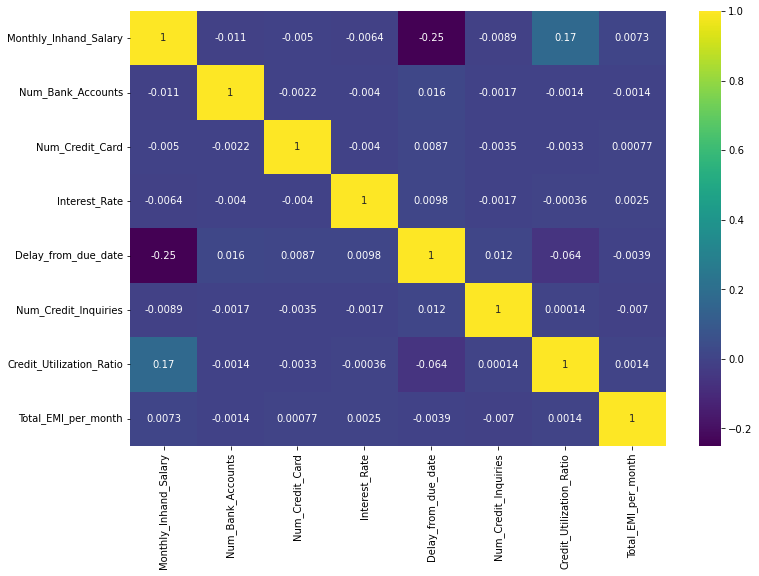

In [121]:

plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, cmap='viridis')

In [126]:
installment = train.hvplot.hist(
    y='Total_EMI_per_month', by='Credit_Score', subplots=False, 
    width=350, height=400, bins=50, alpha=0.4, 
    title="Total_EMI_per_month by Outstanding_Debt", 
    xlabel='Total_EMI_per_month', ylabel='Counts', legend='top'
)

loan_amnt = train.hvplot.hist(
    y='Monthly_Balance', by='Credit_Score', subplots=False, 
    width=350, height=400, bins=30, alpha=0.4, 
    title="Monthly_Balance by Outstanding_Debt", 
    xlabel='Loan Monthly_Balance', ylabel='Counts', legend='top'
)

installment + loan_amnt

AttributeError: 'DataFrame' object has no attribute 'hvplot'